In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
cars= pd.read_csv('ML_cars.csv')
cars.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

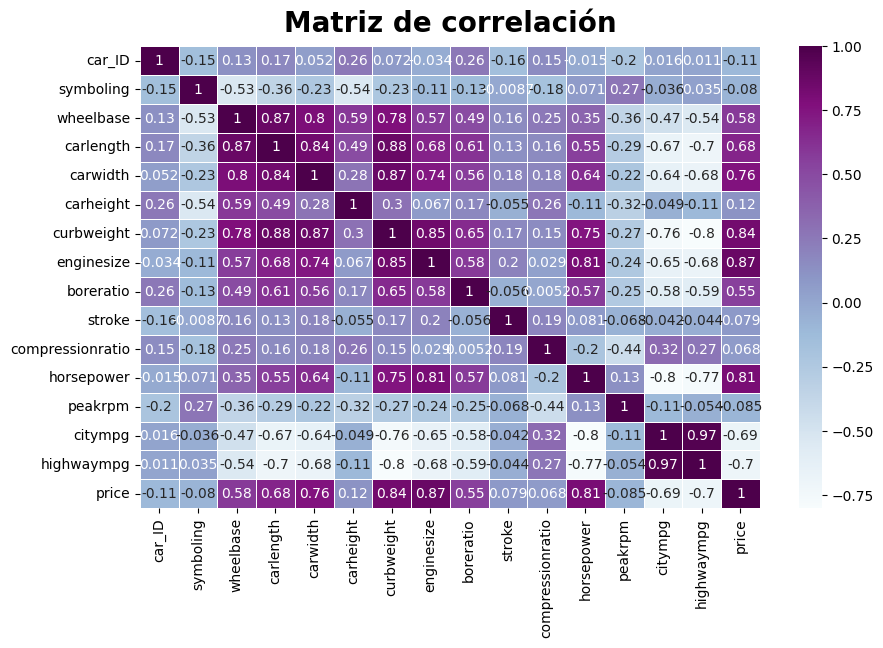

In [5]:
cars_numeric= cars.select_dtypes(include=[np.number])

# Graficamos la matriz de correlacion 
plt.figure(figsize=(10, 6))
sns.heatmap(cars_numeric.corr(), annot=True, cmap='BuPu', linewidths=.5)
plt.title('Matriz de correlación', fontweight='bold', fontsize=20, ha='center', va='bottom')
plt.show()


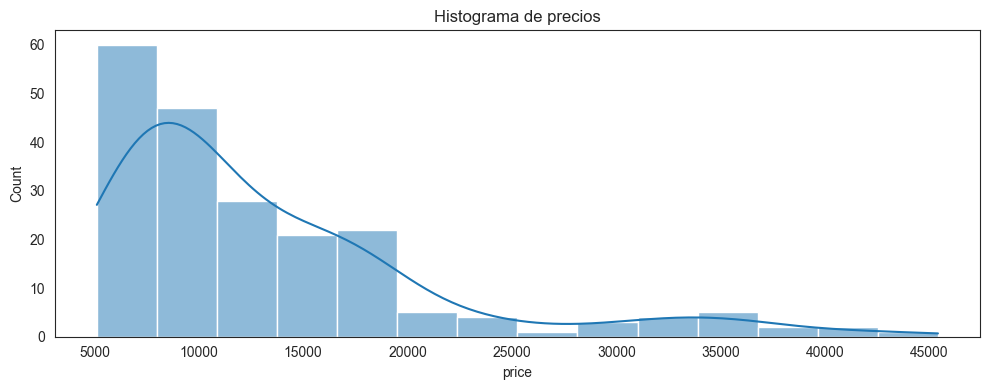

In [6]:
plt.figure(figsize=(10,4))
sns.set_style("white")
sns.histplot(data= cars_numeric, x= 'price', kde= True)
plt.title('Histograma de precios')
plt.tight_layout()

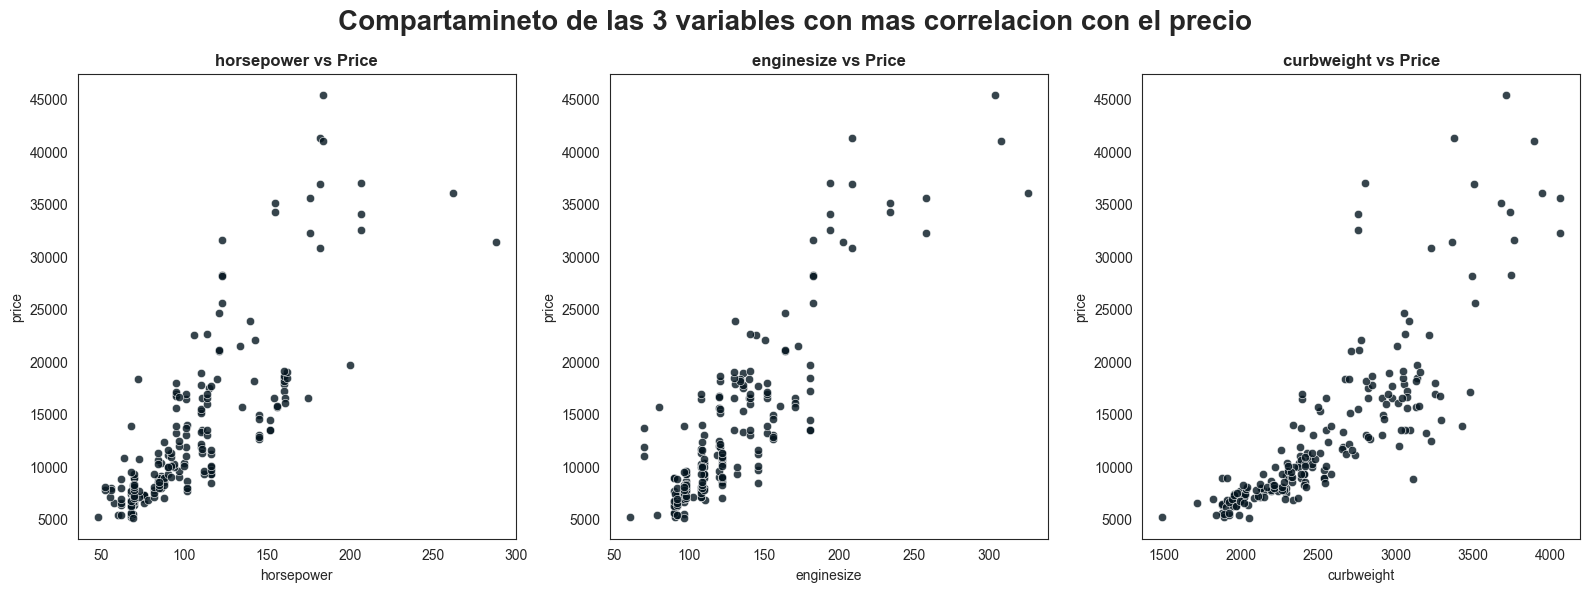

In [7]:
columns = cars_numeric[['horsepower','enginesize','curbweight' ]]

plt.figure(figsize=(16, 6))
sns.set_style("white")
# Definimos subplots de 2 filas y 3 columnas, mas la ubicacion de cada grafico varia por cada ciclo del for 
for i, column in enumerate(columns):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=cars_numeric, x=column, y='price', alpha= 0.8, color= '#04151F')
    plt.title(f'{column} vs Price',  fontweight="bold")
    plt.grid(False)
    plt.tight_layout()
    plt.suptitle('Compartamineto de las 3 variables con mas correlacion con el precio', fontsize=20, fontweight="bold")

plt.show()


In [8]:
cars_category= cars.select_dtypes(include=['object'])

for column in cars_category:
    print("\n",cars_category[column].value_counts())


 CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

 fueltype
gas       185
diesel     20
Name: count, dtype: int64

 aspiration
std      168
turbo     37
Name: count, dtype: int64

 doornumber
four    115
two      90
Name: count, dtype: int64

 carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

 drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

 enginelocation
front    202
rear       3
Name: count, dtype: int64

 enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

 cylindernumber
four      159
six        24
five       11
eight       5
tw

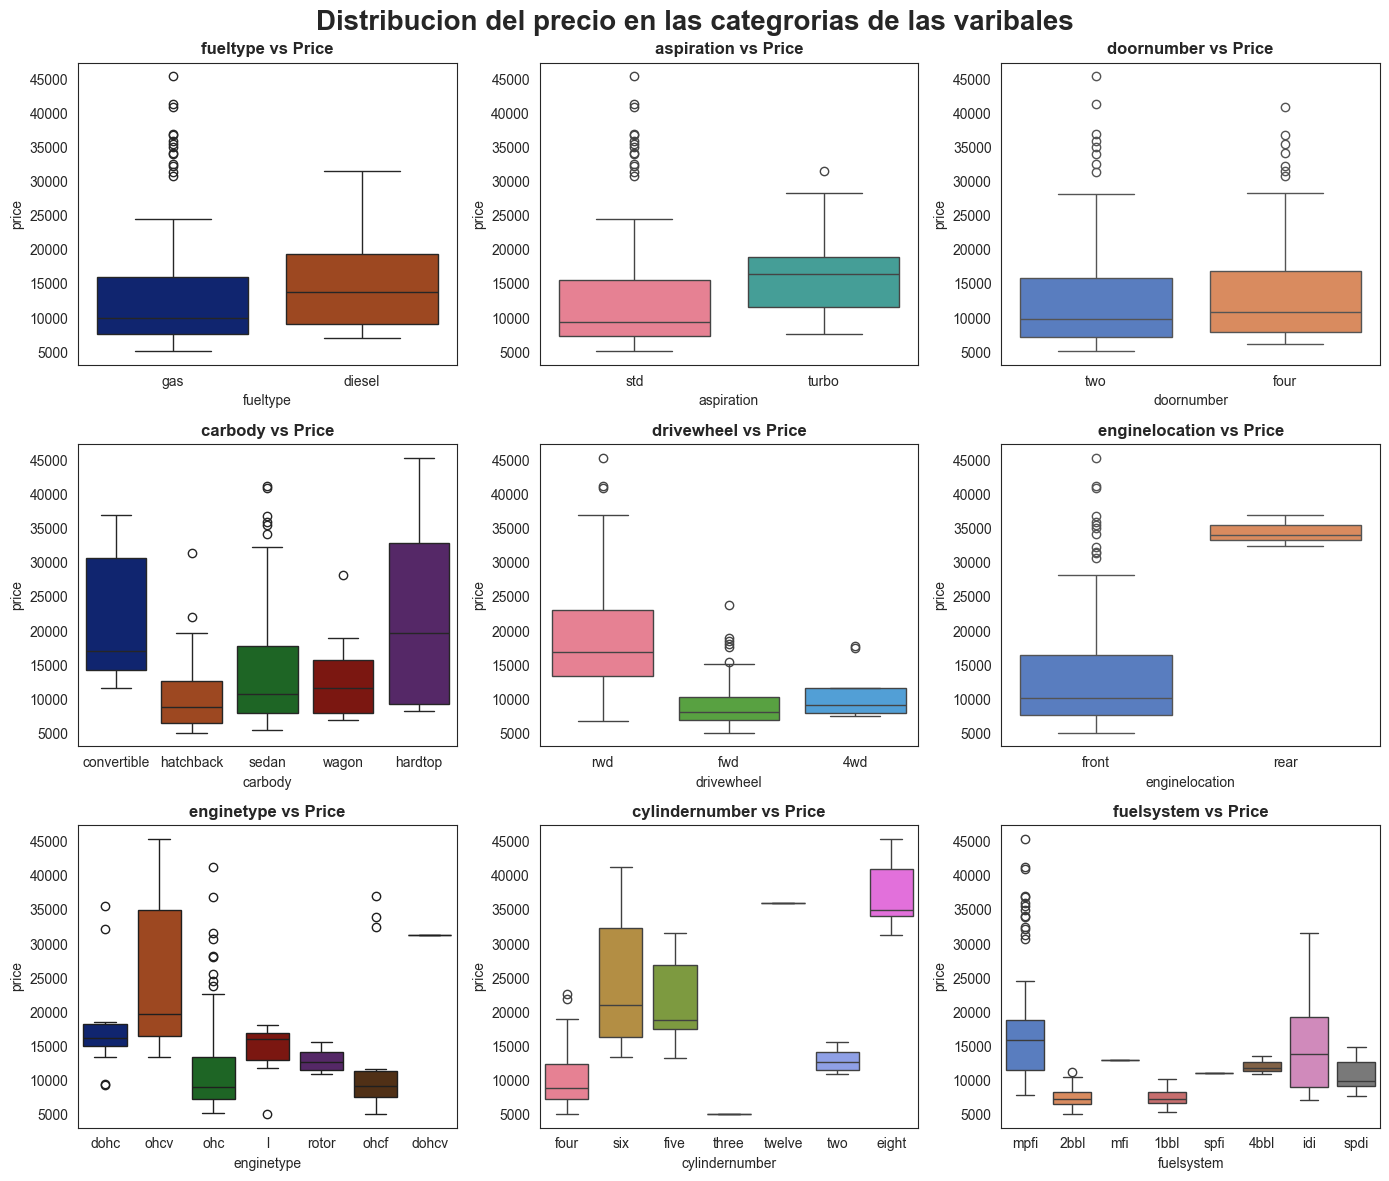

In [9]:
columns= cars_category.drop('CarName', axis= 1)
paletas = ['dark', 'husl', 'muted','dark','husl', 'muted','dark', 'husl', 'muted']
sns.set_style("white")
plt.figure(figsize=(14,12))

for i, (column, paleta) in enumerate(zip(columns,paletas)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=cars, x=column, y= 'price', hue=column, palette=paleta)
    plt.title(f'{column} vs Price', fontweight="bold")
    plt.grid(False)
    plt.tight_layout()
    plt.suptitle('Distribucion del precio en las categrorias de las varibales',fontsize=20, fontweight="bold")
plt.show()


In [10]:
cars_dummies= cars_category.drop('CarName', axis= 1)
cars_dummies = pd.concat([cars_dummies, cars_numeric['price']], axis= 1)
cars_dummies=pd.get_dummies(cars_dummies)
cars_dummies.head(4)

,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,13495.0,False,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,16500.0,False,True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,16500.0,False,True,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,13950.0,False,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [11]:
price_corr_cate= cars_dummies.corr()
price_corr_cate= price_corr_cate.loc['price']
price_corr_cate= price_corr_cate[abs(price_corr_cate) > 0.10]
price_corr_cate

price                    1.000000
fueltype_diesel          0.105679
fueltype_gas            -0.105679
aspiration_std          -0.177926
aspiration_turbo         0.177926
carbody_convertible      0.187681
carbody_hardtop          0.225854
carbody_hatchback       -0.262039
carbody_sedan            0.125716
drivewheel_fwd          -0.601950
drivewheel_rwd           0.638957
enginelocation_front    -0.324973
enginelocation_rear      0.324973
enginetype_dohc          0.151429
enginetype_dohcv         0.159225
enginetype_ohc          -0.344270
enginetype_ohcv          0.385991
cylindernumber_eight     0.478614
cylindernumber_five      0.249606
cylindernumber_four     -0.697762
cylindernumber_six       0.474978
cylindernumber_twelve    0.199634
fuelsystem_1bbl         -0.170945
fuelsystem_2bbl         -0.501374
fuelsystem_idi           0.105679
fuelsystem_mpfi          0.517075
Name: price, dtype: float64

In [12]:
cars_numeric.drop('car_ID', axis= 1, inplace= True)

In [13]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

cars_numeric_sca= ss.fit_transform(cars_numeric)


cars_numeric_sca= pd.DataFrame(cars_numeric_sca, columns= cars_numeric.columns)

cars_numeric_sca


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752
201,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810
202,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983
203,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582


In [14]:
cars_dummies.drop('price', axis= 1, inplace= True)
datos_sca= pd.concat([cars_dummies, cars_numeric_sca], axis= 1)

In [15]:
y_sca= datos_sca['price']
x_sca= datos_sca.drop('price', axis=1)

from sklearn.model_selection import train_test_split

x_train_sca, x_test_sca, y_train_sca, y_test_sca = train_test_split(x_sca, y_sca, test_size= 0.20, random_state= 18)

print(x_train_sca.shape)
print(x_test_sca.shape)
print(y_train_sca.shape)
print(y_test_sca.shape)

(164, 52)
(41, 52)
(164,)
(41,)


In [16]:
from sklearn.linear_model import LinearRegression
lineal_reg= LinearRegression()

In [17]:
lineal_reg.fit(x_train_sca,y_train_sca)

LinearRegression()

In [18]:
lineal_predict_sca= lineal_reg.predict(x_test_sca)

In [19]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = round(mean_absolute_error(y_test_sca, lineal_predict_sca),3)

r2 = round(r2_score(y_test_sca, lineal_predict_sca),3) 

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.325
R²: 0.854


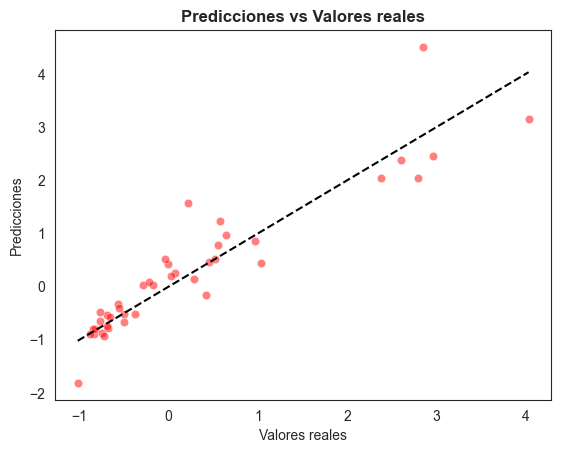

In [20]:
# Realizamos el grafico 
sns.set_style("white")
sns.scatterplot(x=y_test_sca, y=lineal_predict_sca, color= 'red',alpha= 0.5)
plt.plot([y_test_sca.min(), y_test_sca.max()], [y_test_sca.min(), y_test_sca.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

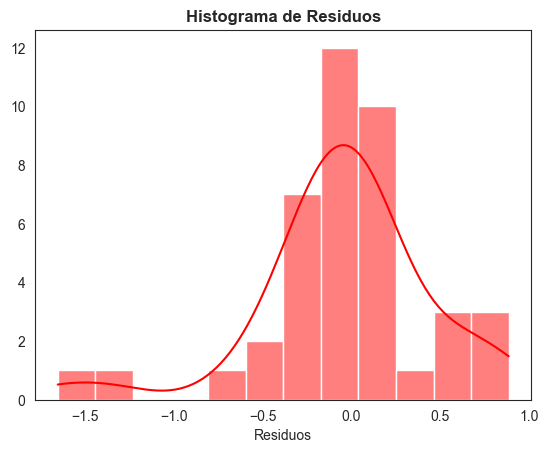

In [21]:
# Calculamos las errores 
residuos = y_test_sca - lineal_predict_sca

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, color= 'red', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestRegressor
randomf= RandomForestRegressor()

In [23]:
randomf.fit(x_train_sca,y_train_sca)

RandomForestRegressor()

In [24]:
rf_predict= randomf.predict(x_test_sca)

In [25]:
mae = round(mean_absolute_error(y_test_sca, rf_predict),3)

r2 = round(r2_score(y_test_sca, rf_predict),3)

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.205
R²: 0.943


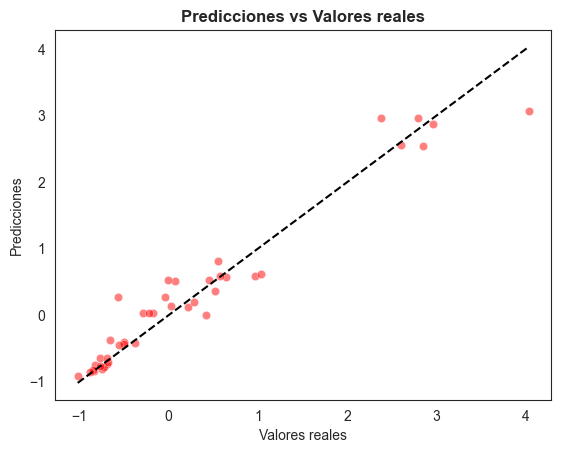

In [26]:
# Realizamos el grafico 
sns.set_style("white")
sns.scatterplot(x=y_test_sca, y= rf_predict, color= 'red',alpha= 0.5)
plt.plot([y_test_sca.min(), y_test_sca.max()], [y_test_sca.min(), y_test_sca.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

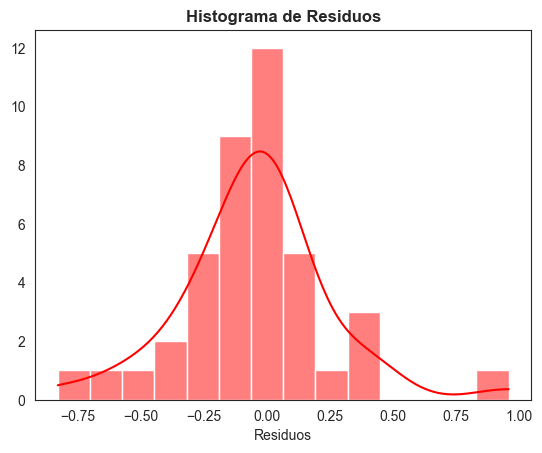

In [27]:
residuos = y_test_sca - rf_predict

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, color= 'red', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()

In [28]:
nombres_variables = x_train_sca.columns
importancias = randomf.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 3)}")

La importancia de las características en el modelo de Random Forest:
fueltype_diesel: 0.0
fueltype_gas: 0.001
aspiration_std: 0.002
aspiration_turbo: 0.001
doornumber_four: 0.001
doornumber_two: 0.0
carbody_convertible: 0.002
carbody_hardtop: 0.0
carbody_hatchback: 0.001
carbody_sedan: 0.002
carbody_wagon: 0.001
drivewheel_4wd: 0.0
drivewheel_fwd: 0.001
drivewheel_rwd: 0.001
enginelocation_front: 0.0
enginelocation_rear: 0.0
enginetype_dohc: 0.0
enginetype_dohcv: 0.0
enginetype_l: 0.0
enginetype_ohc: 0.002
enginetype_ohcf: 0.0
enginetype_ohcv: 0.001
enginetype_rotor: 0.0
cylindernumber_eight: 0.0
cylindernumber_five: 0.001
cylindernumber_four: 0.0
cylindernumber_six: 0.001
cylindernumber_three: 0.0
cylindernumber_twelve: 0.0
cylindernumber_two: 0.0
fuelsystem_1bbl: 0.0
fuelsystem_2bbl: 0.0
fuelsystem_4bbl: 0.0
fuelsystem_idi: 0.0
fuelsystem_mfi: 0.0
fuelsystem_mpfi: 0.001
fuelsystem_spdi: 0.0
fuelsystem_spfi: 0.0
symboling: 0.002
wheelbase: 0.007
carlength: 0.01
carwidth: 0.016
carheig

In [29]:
cars_category = pd.concat([cars_dummies, cars_numeric_sca['price']], axis=1)

y_cat=cars_category['price']
x_cat= cars_category.drop('price', axis= 1)

In [30]:
x_train_cat, x_test_cat,y_train_cat, y_test_cat = train_test_split(x_cat, y_cat, test_size= 0.20, random_state= 18)

In [31]:
randomf_cat= RandomForestRegressor()

randomf_cat.fit(x_train_cat, y_train_cat)

RandomForestRegressor()

In [32]:
randomf_predict_cat= randomf_cat.predict(x_test_cat) 

In [33]:
mae = round(mean_absolute_error(y_test_sca, randomf_predict_cat),3)

r2 = round(r2_score(y_test_sca, randomf_predict_cat),3)

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 0.507
R²: 0.621


In [34]:
nombres_variables = x_train_cat.columns
importancias = randomf_cat.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 2)}")

La importancia de las características en el modelo de Random Forest:
fueltype_diesel: 0.0
fueltype_gas: 0.0
aspiration_std: 0.02
aspiration_turbo: 0.02
doornumber_four: 0.02
doornumber_two: 0.01
carbody_convertible: 0.01
carbody_hardtop: 0.02
carbody_hatchback: 0.03
carbody_sedan: 0.01
carbody_wagon: 0.0
drivewheel_4wd: 0.0
drivewheel_fwd: 0.01
drivewheel_rwd: 0.16
enginelocation_front: 0.01
enginelocation_rear: 0.01
enginetype_dohc: 0.02
enginetype_dohcv: 0.0
enginetype_l: 0.0
enginetype_ohc: 0.03
enginetype_ohcf: 0.01
enginetype_ohcv: 0.0
enginetype_rotor: 0.0
cylindernumber_eight: 0.08
cylindernumber_five: 0.01
cylindernumber_four: 0.45
cylindernumber_six: 0.01
cylindernumber_three: 0.0
cylindernumber_twelve: 0.0
cylindernumber_two: 0.0
fuelsystem_1bbl: 0.0
fuelsystem_2bbl: 0.03
fuelsystem_4bbl: 0.0
fuelsystem_idi: 0.0
fuelsystem_mfi: 0.0
fuelsystem_mpfi: 0.03
fuelsystem_spdi: 0.0
fuelsystem_spfi: 0.0


In [35]:
x_num= cars_numeric_sca.drop('price',axis=1)
y_num=cars_numeric_sca['price']

In [36]:
x_train_num, x_test_num, y_train_num,y_test_num = train_test_split(x_num,y_num, test_size=0.2, random_state=32)

In [37]:
randomf_num= RandomForestRegressor()

In [38]:
randomf_num.fit(x_train_num,y_train_num)

RandomForestRegressor()

In [39]:
randomf_predict_num= randomf_num.predict(x_test_num)

In [40]:
mae = round(mean_absolute_error(y_test_sca, randomf_predict_num),3)

r2 = round(r2_score(y_test_sca, randomf_predict_num),3)

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 1.001
R²: -0.443


In [41]:
nombres_variables = x_train_num.columns
importancias = randomf_num.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 2)}")

La importancia de las características en el modelo de Random Forest:
symboling: 0.0
wheelbase: 0.01
carlength: 0.01
carwidth: 0.01
carheight: 0.01
curbweight: 0.17
enginesize: 0.69
boreratio: 0.0
stroke: 0.01
compressionratio: 0.01
horsepower: 0.03
peakrpm: 0.01
citympg: 0.01
highwaympg: 0.03


Entremaniento del RandomForestRegressor con los datos sin escalar


In [42]:
datos= pd.concat([cars_dummies, cars_numeric],axis=1)
datos.columns

Index(['fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginelocation_rear', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', '

In [43]:
x= datos.drop('price', axis=1)
y= datos['price']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=18)

In [45]:
randomforest= RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
randomf_predict= randomforest.predict(x_test)

In [47]:
mae = round(mean_absolute_error(y_test, randomf_predict),3)

r2 = round(r2_score(y_test, randomf_predict),2)

print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 1601.1
R²: 0.95


In [48]:
nombres_variables = x_train.columns
importancias = randomforest.feature_importances_

print("La importancia de las características en el modelo de Random Forest:")
for nombre, importancia in zip(nombres_variables, importancias):
    print(f"{nombre}: {round(importancia, 2)}")

La importancia de las características en el modelo de Random Forest:
fueltype_diesel: 0.0
fueltype_gas: 0.0
aspiration_std: 0.0
aspiration_turbo: 0.0
doornumber_four: 0.0
doornumber_two: 0.0
carbody_convertible: 0.0
carbody_hardtop: 0.0
carbody_hatchback: 0.0
carbody_sedan: 0.0
carbody_wagon: 0.0
drivewheel_4wd: 0.0
drivewheel_fwd: 0.0
drivewheel_rwd: 0.0
enginelocation_front: 0.0
enginelocation_rear: 0.0
enginetype_dohc: 0.0
enginetype_dohcv: 0.0
enginetype_l: 0.0
enginetype_ohc: 0.0
enginetype_ohcf: 0.0
enginetype_ohcv: 0.0
enginetype_rotor: 0.0
cylindernumber_eight: 0.0
cylindernumber_five: 0.0
cylindernumber_four: 0.0
cylindernumber_six: 0.0
cylindernumber_three: 0.0
cylindernumber_twelve: 0.0
cylindernumber_two: 0.0
fuelsystem_1bbl: 0.0
fuelsystem_2bbl: 0.0
fuelsystem_4bbl: 0.0
fuelsystem_idi: 0.0
fuelsystem_mfi: 0.0
fuelsystem_mpfi: 0.0
fuelsystem_spdi: 0.0
fuelsystem_spfi: 0.0
symboling: 0.0
wheelbase: 0.01
carlength: 0.01
carwidth: 0.01
carheight: 0.01
curbweight: 0.33
enginesi

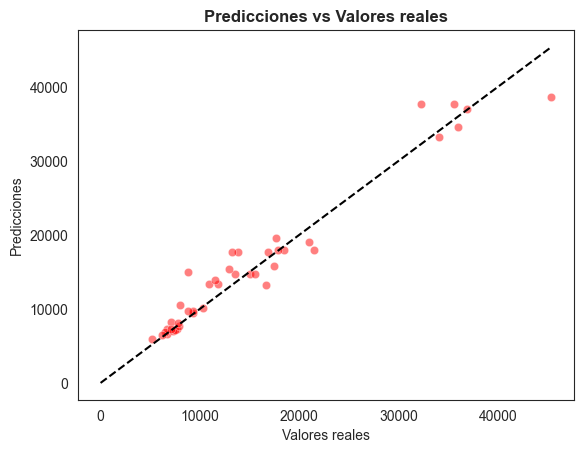

In [50]:
sns.set_style("white")
sns.scatterplot(x=y_test, y= randomf_predict, color= 'red',alpha= 0.5)
plt.plot([y_test_sca.min(), y_test.max()], [y_test_sca.min(), y_test.max()], 'k--', lw=1.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales", fontweight="bold")
plt.grid(False)

plt.show()

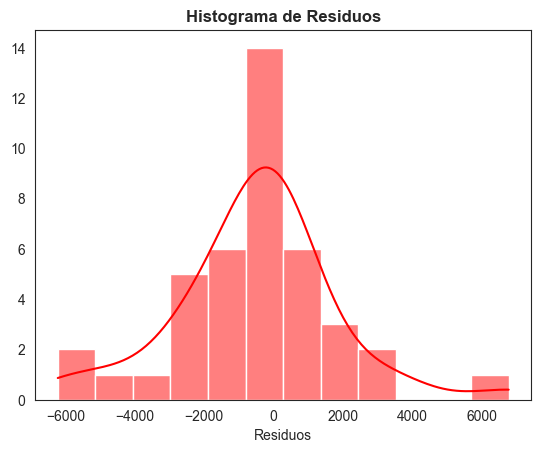

In [51]:
residuos = y_test - randomf_predict

# Graficamos el histograma 
sns.set_style("white")
sns.histplot(residuos, color= 'red', kde=True)
plt.xlabel("Residuos")
plt.ylabel("")
plt.title("Histograma de Residuos",fontweight="bold")
plt.show()